### Proyek Analisis Data dengan Python - Dicoding Indonesia
 - Name        : Romi Ramadani
 - Email       : romyramadhan021@gmail.com
 - ID Dicoding : romi_ramadani

### Menentukan Pertanyaan Bisnis
- Bagaimana pola penggunaan sepeda berbagi berdasarkan waktu? (harian, mingguan, bulanan, atau musiman).
- Faktor-faktor apa saja yang paling mempengaruhi jumlah penyewaan sepeda? (cuaca, hari kerja atau akhir pekan, suhu, dll.)
- Apakah ada perbedaan penggunaan sepeda berdasarkan kategori pengguna (misalnya, member vs non-member)?
- Seberapa lama durasi rata-rata penyewaan sepeda, dan faktor apa saja yang mempengaruhi durasi penyewaan?
- Bagaimana cara mengoptimalkan penyediaan sepeda agar tersedia ketika dibutuhkan di lokasi yang tepat?

### Import Semua Packages/Library yang Digunakan
Sebelum memulai proyek, terlebih dahulu kita melakukan mengimport semua library yang dibutuhkan guna untuk memudahkan proyek analisis data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Data Wrangling

#### Gathering Data

Pada tahapan ini kita melakukan pengumpulan Data. Data pada proyek kali ini saya memilih <b>Bike Sharing Dataset</b> dari <b>Kaggle.com</b> terdapat 2 file yang harus diimport pada dataset ini yaitu file day.csv dan hour.csv

#### Load Data Day.csv

In [3]:
day_df = pd.read_csv("D:\Data Science - Dicoding\proyek_data_analisis\submission\data\day.csv")
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2772073060.py:1: SyntaxWarning: invalid escape sequence '\D'
  day_df = pd.read_csv("D:\Data Science - Dicoding\proyek_data_analisis\submission\data\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Data Hour.csv

In [4]:
hr_df = pd.read_csv("D:\Data Science - Dicoding\proyek_data_analisis\submission\data\hour.csv")
hr_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\762440281.py:1: SyntaxWarning: invalid escape sequence '\D'
  hr_df = pd.read_csv("D:\Data Science - Dicoding\proyek_data_analisis\submission\data\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Melakukan Assesing Data

In [5]:
# Assesing Data Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Mengecek apakah ada missing Values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Mengecek Data Duplikasi 
print("Jumlah duplikasi data day : ", day_df.duplicated().sum())

Jumlah duplikasi data day :  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Assesing Data Hour
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Mengecek apakah ada missing Values
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Mengecek Data Duplikasi 
print("Jumlah duplikasi data hour : ", hr_df.duplicated().sum())

Jumlah duplikasi data hour :  0


In [12]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
# Menghapus duplikasi (jika ada)
day_df.drop_duplicates(inplace=True)
hr_df.drop_duplicates(inplace=True)

# Mengisi missing values dengan metode forward fill (jika ada)
day_df.fillna(method='ffill', inplace=True)
hr_df.fillna(method='ffill', inplace=True)

# Mengecek ulang apakah missing values sudah teratasi
print(day_df.isnull().sum())
print(hr_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2117303815.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_df.fillna(method='ffill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2117303815.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hr_df.fillna(method='ffill', inplace=True)


#### Cleaning Data

- Melakukan Perubahan Detail Pada Kolom

Detail kolom dari tabel yang disediakan cukup membingungkan pembaca harus dinormalisasi dengan cara merubah label sehingga tidak ada singkatan dari kolom pada tabel dan mudah untuk dipahami

- Melakukan Perubahan Tipe Data

Melakukan perubahan tipe data seperti dari tipe data Object dari dateTime untuk kolom dateday

- Menormalisasi Value dari kolom

Melakukan normalisasi untuk value kolom dari angka menjadi keterangan supaya mudah dipahami. 
Contoh field season : 
1 => 'Spring'
2 => 'Summer' 
3 => 'Fall'
4 => 'Winter'

In [14]:
# Mengubah nama judul kolom pada tabel day
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# Mengubah angka menjadi keterangan pada beberapa kolom di tabel day
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubah tipe data obj ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

In [18]:
# Mengubah nama judul kolom pada tabel hour
hr_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

hr_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Mengubah angka menjadi keterangan pada beberapa kolom di tabel hour
hr_df['month'] = hr_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

hr_df['season'] = hr_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hr_df['weekday'] = hr_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

hr_df['weather_cond'] = hr_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [20]:
# Mengubah tipe data obj ke datetime
hr_df['dateday'] = pd.to_datetime(hr_df.dateday)

# Mengubaha tipe data ke categorical
hr_df['season'] = hr_df.season.astype('category')
hr_df['year'] = hr_df.year.astype('category')
hr_df['month'] = day_df.month.astype('category')
hr_df['holiday'] = hr_df.holiday.astype('category')
hr_df['weekday'] = hr_df.weekday.astype('category')
hr_df['workingday'] = hr_df.workingday.astype('category')
hr_df['weather_cond'] = hr_df.weather_cond.astype('category')

hr_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         731 non-null    category      
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

#### Exploratory Data Analysis (EDA)

##### Eksplorasi Data day_df

In [22]:
# Pengelompokkan penyewa sepeda berdasarkan month
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2197370822.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [23]:
# Pengelompokkan penyewa sepeda berdasarkan cuaca
day_df.groupby(by='weather_cond').agg({'count': ['max', 'min', 'mean', 'sum']})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2711807323.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({'count': ['max', 'min', 'mean', 'sum']})


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [24]:
# Pengelompokkan penyewa sepeda berdasarkan musim
day_df.groupby(by='season').agg({'casual': 'mean','registered': 'mean','count': ['max', 'min', 'mean']})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\386489975.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({'casual': 'mean','registered': 'mean','count': ['max', 'min', 'mean']})


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

##### Eksplorasi Data hr_df

In [25]:
# Pengelompokkan penyewa sepeda berdasarkan month
hr_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\1335051950.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hr_df.groupby(by='month').agg({


count                     
        max min       mean   sum
month                           
Apr     217   1  54.100000  3246
Aug     217   1  51.967742  3222
Dec     190   1  66.645161  4132
Feb     197   1  55.228070  3148
Jan     110   1  38.661290  2397
Jul     238   1  50.064516  3104
Jun     187   1  55.216667  3313
Mar     249   1  76.516129  4744
May     219   1  63.258065  3922
Nov     185   1  58.566667  3514
Oct     202   1  44.838710  2780
Sep     149   1  55.716667  3343

In [26]:
day_df.groupby(by='weather_cond').agg({'count': ['max', 'min', 'mean', 'sum']})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\1530815319.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({'count': ['max', 'min', 'mean', 'sum']})


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [27]:
day_df.groupby(by='season').agg({'casual': 'mean','registered': 'mean','count': ['max', 'min', 'mean']})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\3939925999.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({'casual': 'mean','registered': 'mean','count': ['max', 'min', 'mean']})


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

##### Pertanyaan 1: Bagaimana pola penggunaan sepeda berbagi berdasarkan waktu? (harian, mingguan, bulanan, atau musiman)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\3035225928.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='count', data=day_df, ci=None, palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\3035225928.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='count', data=day_df, ci=None, palette='Set2')


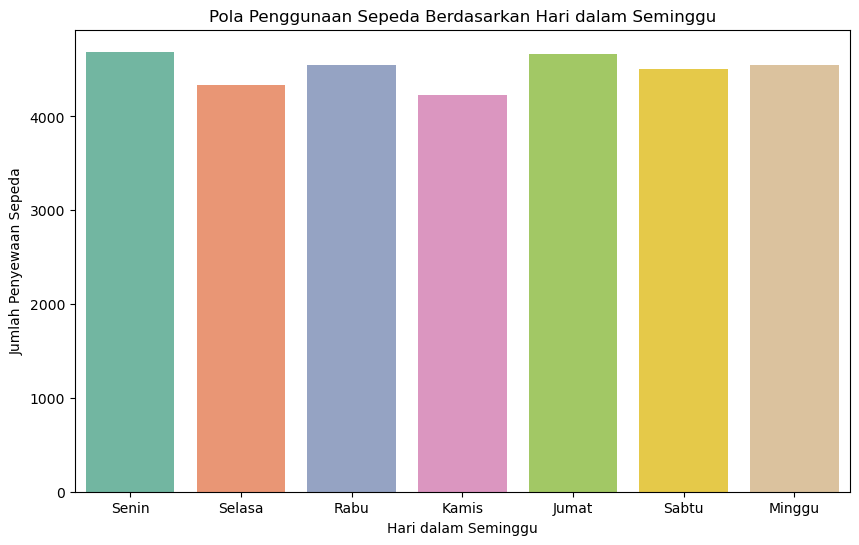

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\3035225928.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='count', data=day_df, ci=None, palette='Paired')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\3035225928.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data=day_df, ci=None, palette='Paired')


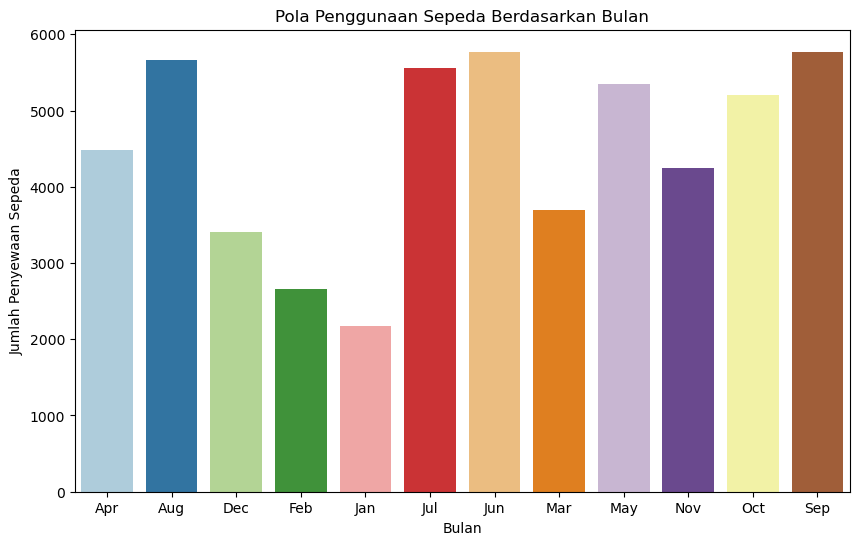

In [28]:
# Menambahkan palet warna agar lebih menarik
sns.set_palette('Set2')

# Pola penggunaan sepeda mingguan
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='count', data=day_df, ci=None, palette='Set2')
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Pola penggunaan sepeda berdasarkan bulan
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=day_df, ci=None, palette='Paired')
plt.title('Pola Penggunaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2738343881.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='count', data=day_df, ci=None, palette='coolwarm')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2738343881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=day_df, ci=None, palette='coolwarm')


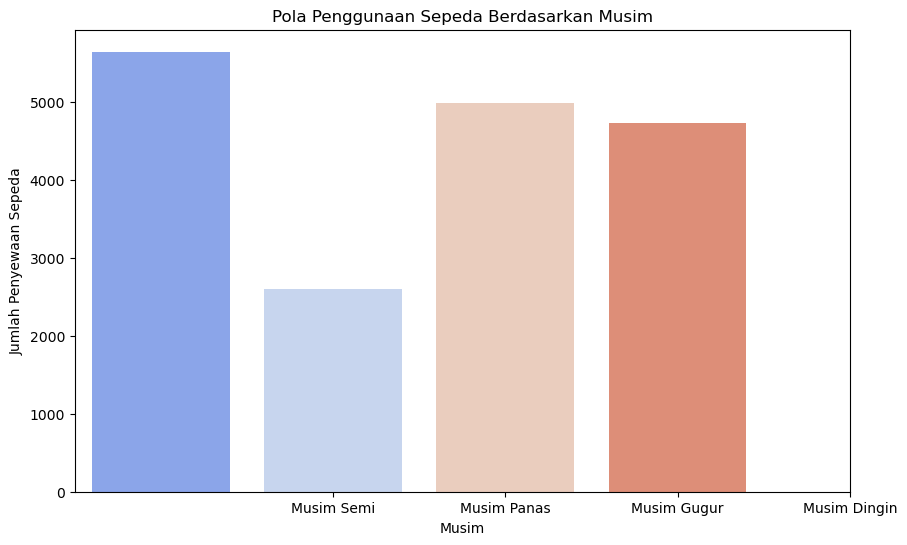

In [29]:
# Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=day_df, ci=None, palette='coolwarm')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()


##### Pertanyaan 2 : Faktor-faktor apa saja yang paling mempengaruhi jumlah penyewaan sepeda? (cuaca, hari kerja atau akhir pekan, suhu, dll.)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\3675514158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_cond', y='count', data=day_df, palette='husl')


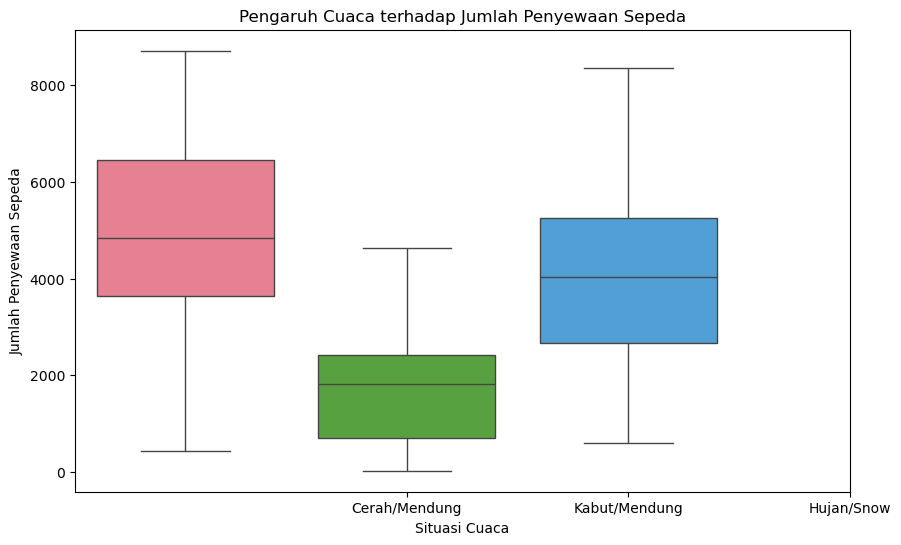

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_cond', y='count', data=day_df, palette='husl')
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[1, 2, 3], labels=['Cerah/Mendung', 'Kabut/Mendung', 'Hujan/Snow'])
plt.show()

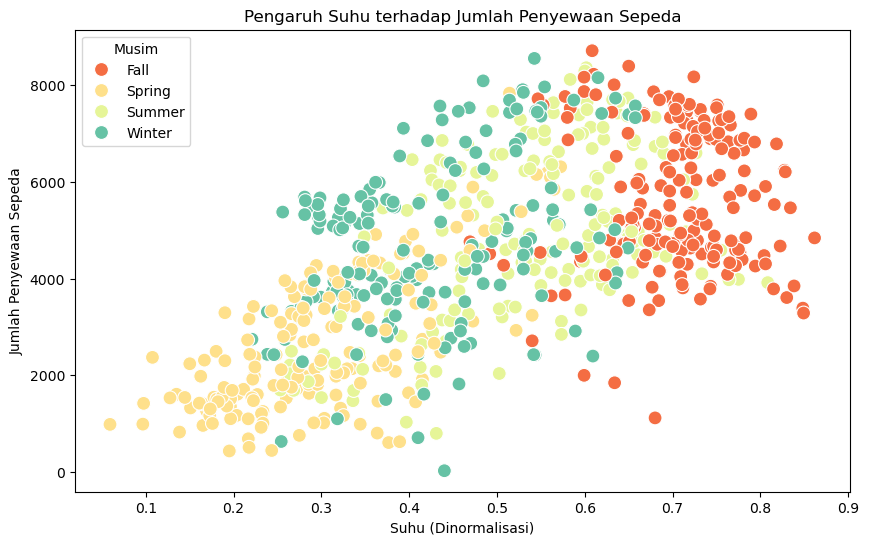

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=day_df, hue='season', palette='Spectral', s=100)
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Dinormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Musim')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\1296187063.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='count', data=day_df, ci=None, palette='cubehelix')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\1296187063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='count', data=day_df, ci=None, palette='cubehelix')


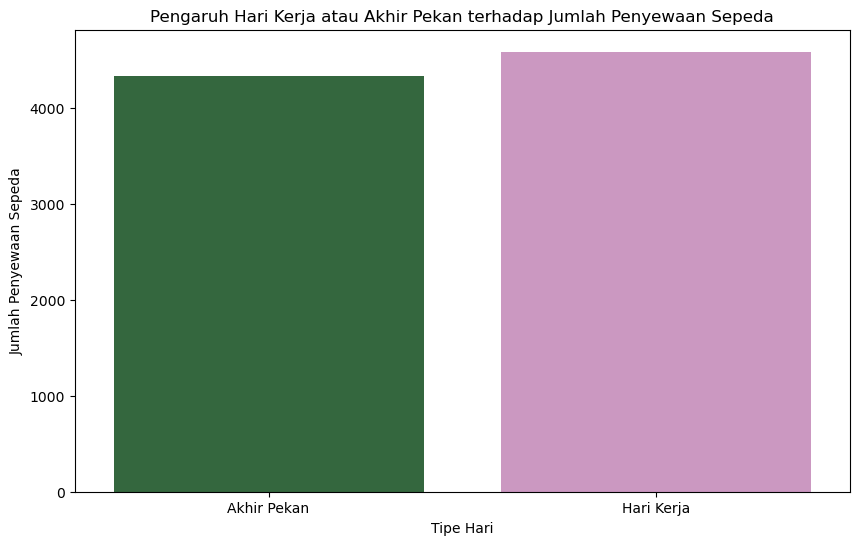

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='count', data=day_df, ci=None, palette='cubehelix')
plt.title('Pengaruh Hari Kerja atau Akhir Pekan terhadap Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan', 'Hari Kerja'])
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

##### Pertanyaan 3 : Apakah ada perbedaan penggunaan sepeda berdasarkan kategori pengguna (misalnya, member vs non-member)?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\522631905.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hour', y='count', hue='user_type', data=hr_df, ci=None, palette='Set2')


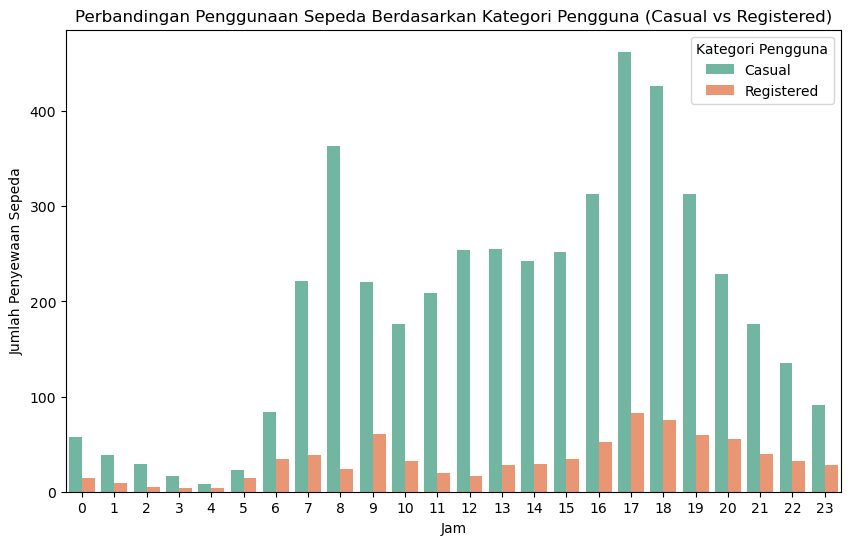

In [33]:
# Membuat kolom baru untuk kategori pengguna
hr_df['user_type'] = hr_df.apply(lambda row: 'Casual' if row['casual'] > 0 else 'Registered', axis=1)

# Visualisasi perbandingan penyewaan sepeda berdasarkan kategori pengguna
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', hue='user_type', data=hr_df, ci=None, palette='Set2')
plt.title('Perbandingan Penggunaan Sepeda Berdasarkan Kategori Pengguna (Casual vs Registered)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kategori Pengguna')
plt.show()

##### Pertanyaan 4 : Seberapa lama durasi rata-rata penyewaan sepeda, dan faktor apa saja yang mempengaruhi durasi penyewaan?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2367718458.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='estimated_duration', data=hr_df, hue='season', palette='coolwarm', ci=None)


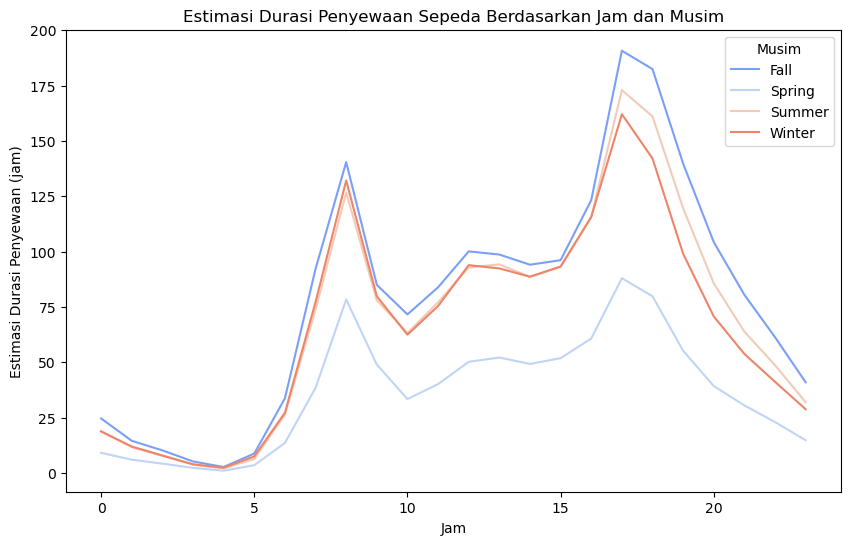

In [34]:
# Menambahkan kolom estimasi durasi
# Asumsi: Durasi penyewaan adalah total penyewaan dalam satu jam (cnt) dibagi dengan jam kerja (8 jam kerja/hari)
hr_df['estimated_duration'] = hr_df['count'] / (24 / 8)  # 8 jam kerja per hari

# Visualisasi estimasi durasi penyewaan berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='estimated_duration', data=hr_df, hue='season', palette='coolwarm', ci=None)
plt.title('Estimasi Durasi Penyewaan Sepeda Berdasarkan Jam dan Musim')
plt.xlabel('Jam')
plt.ylabel('Estimasi Durasi Penyewaan (jam)')
plt.legend(title='Musim')
plt.show()

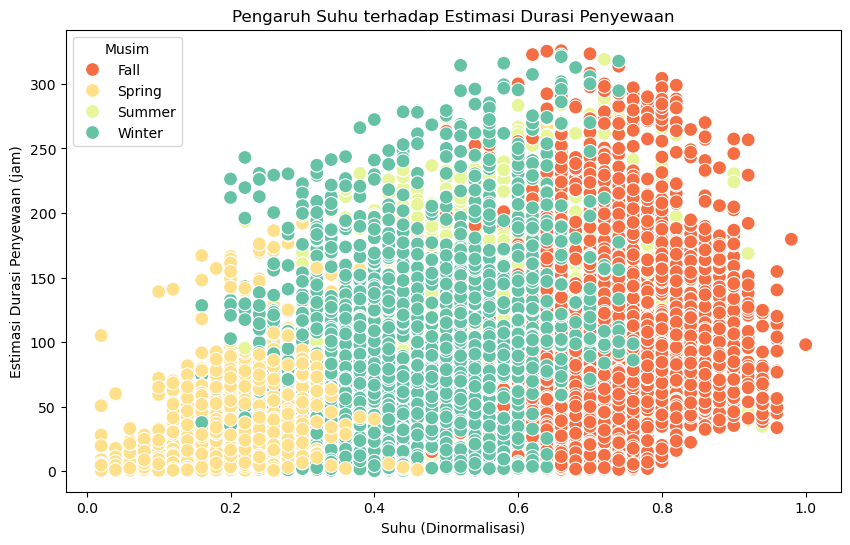

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16084\2739947362.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_cond', y='estimated_duration', data=hr_df, palette='husl')


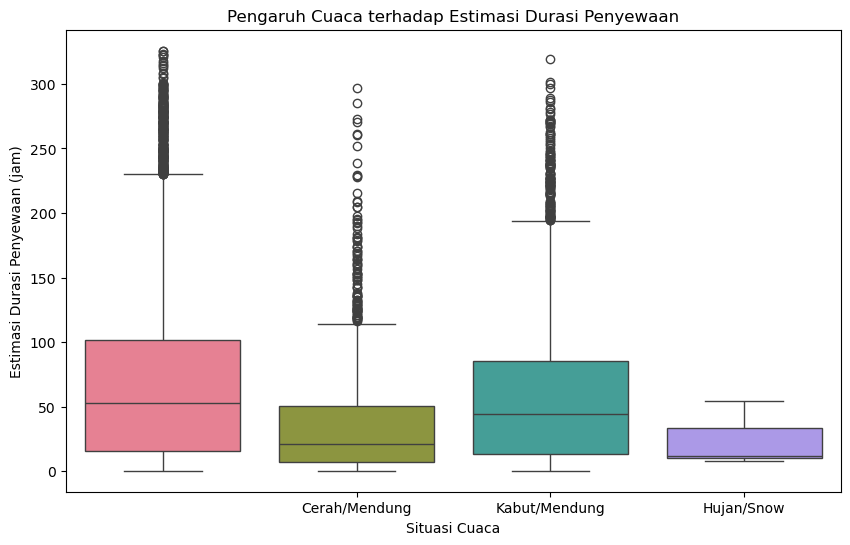

In [35]:
# Visualisasi pengaruh suhu terhadap estimasi durasi penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='estimated_duration', data=hr_df, hue='season', palette='Spectral', s=100)
plt.title('Pengaruh Suhu terhadap Estimasi Durasi Penyewaan')
plt.xlabel('Suhu (Dinormalisasi)')
plt.ylabel('Estimasi Durasi Penyewaan (jam)')
plt.legend(title='Musim')
plt.show()

# Visualisasi pengaruh cuaca terhadap estimasi durasi penyewaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_cond', y='estimated_duration', data=hr_df, palette='husl')
plt.title('Pengaruh Cuaca terhadap Estimasi Durasi Penyewaan')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Estimasi Durasi Penyewaan (jam)')
plt.xticks(ticks=[1, 2, 3], labels=['Cerah/Mendung', 'Kabut/Mendung', 'Hujan/Snow'])
plt.show()


### Analisis Lanjutan RFM
##### Pertanyaan 5 : Bagaimana cara mengoptimalkan penyediaan sepeda agar tersedia ketika dibutuhkan di lokasi yang tepat?

   Recency  Frequency  Monetary
0     4017        985       985
1     4016        801       801
2     4015       1349      1349
3     4014       1562      1562
4     4013       1600      1600


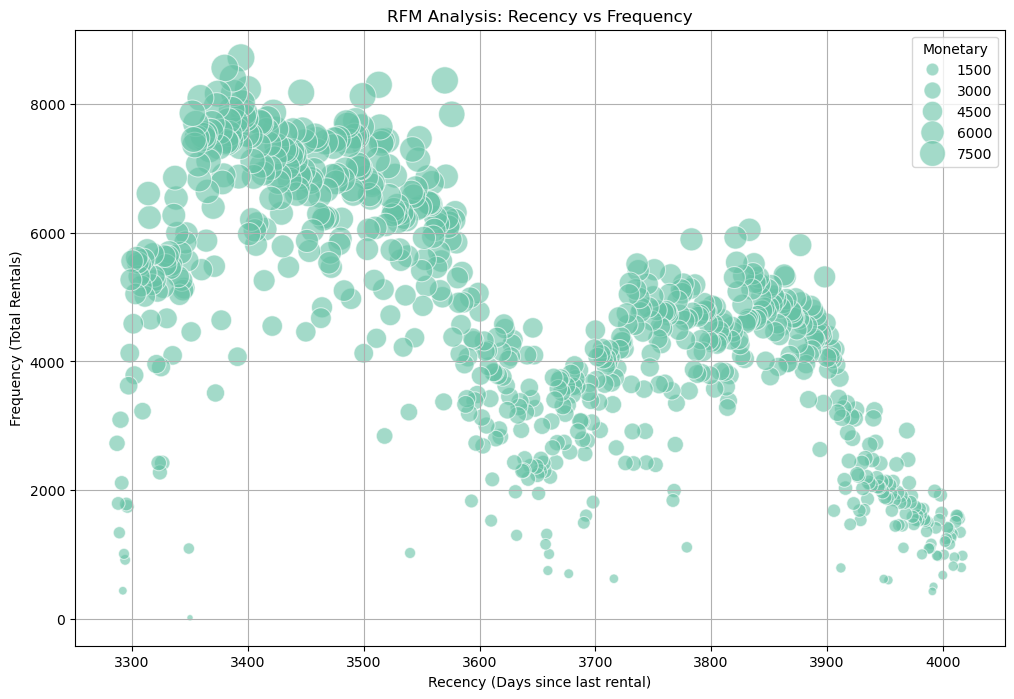

In [36]:
import datetime as dt
# Menentukan tanggal sewa berdasarkan tahun dan bulan dari dataset
hr_df['date'] = pd.to_datetime(hr_df['dateday'])

# Menghitung Recency
# Misalkan kita gunakan tanggal analisis adalah 2021-12-31
analysis_date = dt.datetime(2021, 12, 31)
recency_df = hr_df.groupby('date')['count'].sum().reset_index()
recency_df['Recency'] = (analysis_date - recency_df['date']).dt.days

# Menghitung Frequency dan Monetary
frequency_df = hr_df.groupby('date')['count'].sum().reset_index()
frequency_df['Frequency'] = frequency_df['count']  # Menganggap setiap baris sebagai frekuensi sewa
monetary_df = hr_df.groupby('date')['count'].sum().reset_index()
monetary_df['Monetary'] = monetary_df['count']  # Total penyewaan

# Menggabungkan nilai RFM
rfm_df = recency_df[['Recency']].merge(frequency_df[['Frequency']], left_index=True, right_index=True).merge(monetary_df[['Monetary']], left_index=True, right_index=True)

# Menampilkan DataFrame RFM
print(rfm_df.head())

# Visualisasi RFM
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Frequency', size='Monetary', data=rfm_df, sizes=(20, 400), alpha=0.6)
plt.title('RFM Analysis: Recency vs Frequency')
plt.xlabel('Recency (Days since last rental)')
plt.ylabel('Frequency (Total Rentals)')
plt.grid(True)
plt.show()

### Conclusion
1. Bagaimana pola penggunaan sepeda berbagi berdasarkan waktu? (harian, mingguan, bulanan, atau musiman).

 - Berdasarkan grafik pola pengggunaan sepeda untuk terbanyak terjadi pada hari jumat ini menunjukkan penyewa dapat meningkatkan jumlah sepeda untuk dihari tersebut.
 - Berdasarkan grafik penggunaan sepeda paling banyak dibulan september dan musim yang banyak penyewa adalah musim semi.

2. Faktor-faktor apa saja yang paling mempengaruhi jumlah penyewaan sepeda? (cuaca, hari kerja atau akhir pekan, suhu, dll.)
    
    Berdasarkan boxplot dan grafik faktor yang mempengaruhi jumlah penyewaan sepeda terjadi pada cuaca cerah/mendung untuk penyewaan yang lebih banyak, kemudian penyewaan terbanyak terjadi pada musim fall dan penyewaan lebih banyak pada hari kerja atau biasa dibandingkan akhir pekan.

3. Apakah ada perbedaan penggunaan sepeda berdasarkan kategori pengguna (misalnya, member vs non-member)?
    
    Berdasarkan grafik penggunaan lebih banyak terjadi pada pengguna dengan kategori non - member ini bisa menjadi sasaran untuk marketing supaya menarik pengguna biasa menjadi member

4. Seberapa lama durasi rata-rata penyewaan sepeda, dan faktor apa saja yang mempengaruhi durasi penyewaan?
    
    Berdasarkan grafik durasi penyewaan sepeda rata rata banyak dimusim fall, kemudian pada musim winter yang cenderung durasi penyewaan lebih lama dan estimasi penyewaan untuk cuaca cerah/mendung cukup mempengaruhi penjimaman sepeda.

5. Bagaimana cara mengoptimalkan penyediaan sepeda agar tersedia ketika dibutuhkan di lokasi yang tepat?
    
    Berdasarkan grafik dapat disimpulkan ; Pelanggan dengan frequency tinggi dan recency rendah (pada sisi kiri atas grafik) menunjukkan bahwa di beberapa lokasi, sepeda sering digunakan dan baru saja disewa. Pelanggan dengan frequency rendah dan recency tinggi (sisi kanan bawah) menandakan lokasi atau pelanggan yang tidak lagi aktif menyewa. Sepeda perlu ditempatkan sebelum aktivitas rental mencapai puncak (yaitu di area dengan frequency tinggi). Dengan memantau pola recency dan frekuensi dari data sebelumnya, penyedia bisa memperkirakan kapan dan di mana sepeda akan paling dibutuhkan. Ukuran bubble di grafik menunjukkan bahwa pelanggan yang bertransaksi lebih besar (monetary tinggi) cenderung berada di area dengan frequency tinggi.